In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['target','flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
a = iris.data
b = iris.target

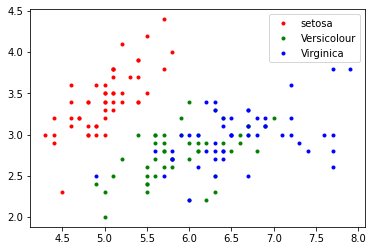

In [ ]:
plt.plot(a[:, 0][b==0], a[:, 1][b==0], 'r.', label='setosa')
plt.plot(a[:, 0][b==1], a[:, 1][b==1], 'g.', label='Versicolour')
plt.plot(a[:, 0][b==2], a[:, 1][b==2], 'b.', label='Virginica')
plt.legend()
plt.show()

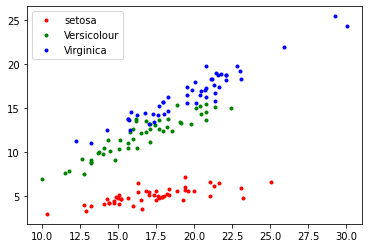

In [ ]:
plt.plot(a[:, 0][b==0]* a[:, 1][b==0], a[:, 1][b==0]* a[:, 2][b==0], 'r.', label='setosa')
plt.plot(a[:, 0][b==1]* a[:, 1][b==1], a[:, 1][b==1]* a[:, 2][b==1], 'g.', label='Versicolour')
plt.plot(a[:, 0][b==2]* a[:, 1][b==2], a[:, 1][b==2]* a[:, 2][b==2], 'b.', label='Virginica')
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  8]])

Text(69.0, 0.5, 'Truth')

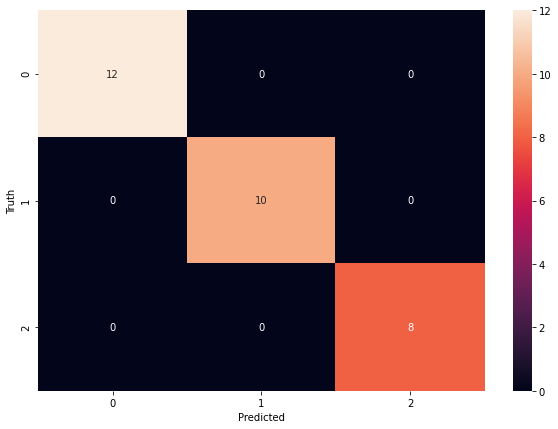

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


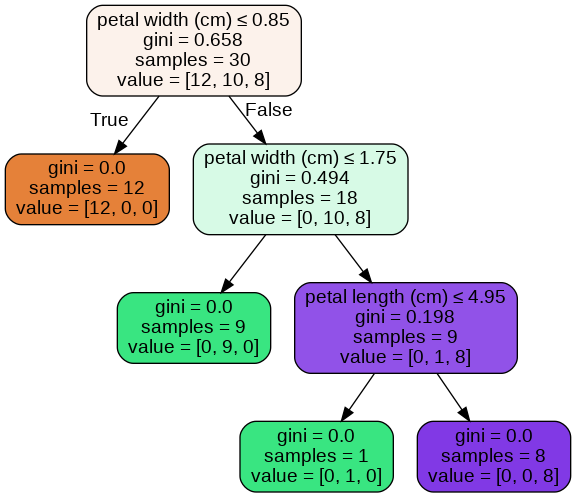

In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
print("[INFO] Saving model...")
saved_model=pickle.dump(model,open('/content/drive/My Drive/iris_model.pkl', 'wb'))

[INFO] Saving model...


In [ ]:
model = pickle.load(open('/content/drive/My Drive/iris_model.pkl','rb'))  
# Load the pickled model 
#Dec_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

array([2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0,
       1, 1, 0, 2, 0, 2, 2, 0])

In [ ]:
import joblib
filename = '/content/drive/My Drive/iris.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

1.0


In [ ]:
!pip install streamlit

     |████████████████████████████████| 8.2MB 3.1MB/s 
     |████████████████████████████████| 174kB 39.6MB/s 
     |████████████████████████████████| 112kB 37.9MB/s 
     |████████████████████████████████| 4.2MB 32.8MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 
     |████████████████████████████████| 122kB 35.5MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=0b1af0f7086430f0980a413feb2446309729d143fa2a09c01691803902293ce8
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyngrok

     |████████████████████████████████| 747kB 3.9MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=faa96b0b680a02bfa4e677fa380a97d867d576e9fd2b86a8b8376132967a3696
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
!ngrok authtoken 1sU6x13yZdrrriEUXNhkFkpKzQH_2PvSmEmcvPtqzeeXmWNbw

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
model = pickle.load(open('/content/drive/My Drive/iris_model.pkl', 'rb'))
iris = load_iris()
def classify(num):
    if num<0.5:
        return 'Setosa'
    elif num <1.5:
        return 'Versicolor'
    else:
        return 'Virginica'

def main():
    
    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Spark Foundation</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Iris</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;">Flower Name</p></center> 
   </div>
   </div>
   </div>
   """
    st.markdown(html_temp,unsafe_allow_html=True)
    st.header("Iris Classification ")
    activities=['Predict']
    option=st.sidebar.selectbox('Which model would you like to use?',activities)
    st.subheader(option)
    sl=st.slider('Select Sepal Length', 0.0, 10.0)
    sw=st.slider('Select Sepal Width', 0.0, 10.0)
    pl=st.slider('Select Petal Length', 0.0, 10.0)
    pw=st.slider('Select Petal Width', 0.0, 10.0)
    inputs=[[sl,sw,pl,pw]]

    if st.button("Classify"):
        if option=='Predict':
            st.success(classify(model.predict(inputs)))

    if st.button("About"):
      st.header("By Prakhar Mehrishi")
      st.subheader("Intern , The Spark Foundation")
    html_temp = """
    <div class="" style="background-color:orange;" >
    <div class="clearfix">           
    <div class="col-md-12">
    <center><p style="font-size:20px;color:white;margin-top:10px;">Iris Classifier</p></center> 
    </div>
    </div>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
if __name__=='__main__':
  main()

Overwriting app.py


In [ ]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://0ae87fe0cd5e.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py

2021-06-07 12:13:19.192 An update to the [server] config option section was detected. To have these changes be reflected, please restart streamlit.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.231.177.34:80

